# <span style='color:maroon'>  Second project for data analyiss course </span>

##### <span style='color:tan'>  in this projet we have two question the first is aboute the relation between smoking and cancer and the second is aboute the heart disease and its covariate </span>

### <span style='color:maroon'> FIRST QUESTION : </span>

### <span style='color:gray'>1.1_ what is the correct statement ?

##### <span style='color:tan'> by useing odds retio that have the formela :
##### <span style='color:darkgoldenrod'> OR=(P1 / (1-P1)) / (P2 / (1-P2)) 

##### <span style='color:tan'>since the odds retio is =6.75 >1 so we can say that the smoking is causing cancer 
##### <span style='color:tan'> so the correct answer is B that a smoker is 7 times more likely to get cancer compared to non-smoker 

In [323]:
table(cancer,smoker)

      smoker
cancer  0  1
     0  9  8
     1  2 12

In [182]:
((12/20)/(8/20)) /  ((2/11)/(9/11)) 

[1] 6.75

In [93]:
#Or by simplify this
(12/8)/(2/9)

[1] 6.75

### <span style='color:gray'>1.2_ test for association between cancer and smoking

##### <span style='color:tan'> to make the test of association between cancer status and smoking easier we changed the table to excel sheet 

In [5]:
library(readxl)

In [7]:
dataQ1 <- read_excel("Desktop/lectures SMR 6/Data analysis/cancer.xlsx")

ERROR: Error: `path` does not exist: ‘Desktop/lectures SMR 6/Data analysis/cancer.xlsx’


In [97]:
attach(dataQ1)

In [96]:
dataQ1

cancer,smoker
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1


##### <span style='color:darkgoldenrod'> since both response and predictor are categorical, we can apply different tests 

##### <span style='color:tan'> first we use deviance test ,and since p-value=0.0209< Alpha=0.05 so there is significant association between cancer and smoking 

In [98]:
model <- glm(cancer~smoker,family="binomial")

In [183]:
summary(model)


Call:
glm(formula = cancer ~ smoker, family = "binomial")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3537  -0.9936  -0.6335   1.0108   1.8465  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -1.5041     0.7817  -1.924   0.0544 .
smoker        1.9095     0.9052   2.109   0.0349 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 42.684  on 30  degrees of freedom
Residual deviance: 37.352  on 29  degrees of freedom
AIC: 41.352

Number of Fisher Scoring iterations: 4


In [100]:
with(model,pchisq(null.deviance - deviance,df.null-df.residual,lower.tail =FALSE))

[1] 0.02092754

##### <span style='color:tan'>  her we use diffirent tests LRT and Rao and both of them have p-value less than alpha=0.05 so there is significant association between cancer and smoking

In [101]:
anova(model,test = "LRT")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,30,42.68435,NA
smoker,1,5.332816,29,37.35153,0.02092754


In [103]:
anova(model,test = "Rao")

,Df,Deviance,Resid. Df,Resid. Dev,Rao,Pr(>Chi)
NULL,NA,NA,30,42.68435,NA,NA
smoker,1,5.332816,29,37.35153,5.011199,0.02518386


##### -----------------------------------------------------

### <span style='color:maroon'> SECOND QUESTION : </span>

### <span style='color:gray'> 2.1_what is the appropriate model? 

##### <span style='color:tan'> first we call the dataset, and the data have 78 obs and four columns whuch are sex , Age ,ecg and specific heart disease(ca) 

##### <span style='color:tan'> sice the response is categorical we apply Logistic regression but first we change the variabls sex ,ca and ecg to factor and than we can apply Logistic regression 

In [10]:
project_2 <- read_excel("~/Desktop/lectures SMR 6/Data analysis/project_2.xlsx")
 

In [11]:
project_2$ca <- as.factor(project_2$ca)
project_2$sex <- as.factor(project_2$sex)
project_2$ecg <- ordered(project_2$ecg, levels = c("low", "medium", "high"))

In [139]:
project_2

sex,ca,age,ecg
female,0,28,low
male,1,42,low
female,0,46,medium
male,0,45,medium
female,0,34,low
male,1,44,low
female,1,48,medium
male,1,45,medium
female,0,38,low
male,0,45,low


In [206]:
summary(project_2); str(project_2)

     sex     ca          age            ecg    
 female:33   0:37   Min.   :28.00   low   :33  
 male  :45   1:41   1st Qu.:41.25   medium:32  
                    Median :46.50   high  :13  
                    Mean   :46.90              
                    3rd Qu.:53.75              
                    Max.   :63.00              

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	78 obs. of  4 variables:
 $ sex: Factor w/ 2 levels "female","male": 1 2 1 2 1 2 1 2 1 2 ...
 $ ca : Factor w/ 2 levels "0","1": 1 2 1 1 1 2 2 2 1 1 ...
 $ age: num  28 42 46 45 34 44 48 45 38 45 ...
 $ ecg: Ord.factor w/ 3 levels "low"<"medium"<..: 1 1 2 2 1 1 2 2 1 1 ...


In [262]:
logit<- glm(ca~sex+age,data=project_2,family="binomial")

In [325]:
summary(logit);confint(logit)


Call:
glm(formula = ca ~ sex + age, family = "binomial", data = project_2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8263  -1.0021   0.5216   1.0011   2.0901  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -5.05727    1.68088  -3.009  0.00262 **
sexmale      1.37281    0.52576   2.611  0.00903 **
age          0.09351    0.03337   2.803  0.00507 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 107.926  on 77  degrees of freedom
Residual deviance:  92.501  on 75  degrees of freedom
AIC: 98.501

Number of Fisher Scoring iterations: 3


Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-8.65585722,-1.9891786
sexmale,0.37522585,2.4543289
age,0.03200103,0.1643346


##### <span style='color:tan'>as we can see from the output that all of the variables have small p-value and less than Alpha=0.05 so we can say that all variabls have asignificant association with heart disease 

##### <span style='color:tan'>from the output we can explain the age coefficient that each one-unit change in age will increase the log odds of getting heart disease by 0.09351 
##### <span style='color:tan'>and the sex coefficient is that from male to female will increase the log odds of getting heart disease by 1.37281
    

##### <span style='color:tan'>from the confident intervals at all 0.05 level of significant the estimate will be between the values above ,and we can notice that the zero not oncluded in all the intervals

### <span style='color:gray'> 2.2_the test of overall significance

##### <span style='color:tan'> to test the overall signofocance we use the daviance test ,and the deviance test is the analogous to F-test used in linear regression  
##### <span style='color:darkgoldenrod'>H0: the model as a whole is no better than the model with just intercept "null model"
##### <span style='color:darkgoldenrod'>H1: the model is significantly better than the null model 

##### <span style='color:tan'>since the p-value=0.000472 < alpha=0.05 we rejuct H0 so we conclude that there is a significant association with the predictors 

In [192]:
with(logit,pchisq(null.deviance - deviance,df.null-df.residual,lower.tail =FALSE))

[1] 0.0004472102

### <span style='color:gray'>2.3_Is age significantly associated with the heart disease ?

##### <span style='color:tan'> frome the "logit" output we can see that the p-value for Age =0.00507 is less than Alpha=0.05 so there is a significant assocition between heart disease(ca) and Age 

##### <span style='color:tan'>and we cane have the same conclusion with wald test command in the package "mdscore",so we have p-value =0.0050679 < Alpha=0.05 so there is an assocition between heart disease and Age

In [211]:
install.packages("mdscore")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [212]:
library(mdscore)

Loading required package: MASS


In [213]:
wald.test(logit,term=3)

$W
[1] 7.855042

$pvalue
[1] 0.005067918

attr(,"class")
[1] "wald.test"

### <span style='color:gray'>2.4_ who is more likely to have the disease ,men of females ?

##### <span style='color:tan'> her we will use the Odds retio test and its used to binary response variable and a binary predictor variable 
##### <span style='color:darkgoldenrod'> OR= Odd1 / Odd2  =(P1 / (1-P1)) / (P2 / (1-P2))  
##### <span style='color:tan'>we can have OR value manually by using the formula above or by command oddsratio() in "fmsb" package
##### <span style='color:tan'> the value of OR =0.31527 <1 so we conclude that females are not likely to have the disease compared to males 
##### <span style='color:tan'> in another word from the next command OR allmost= 3 >1 so we conclude that males is 3 times more likely to get the heart disease compared to female

In [199]:
table(ca,sex)

   sex
ca  female male
  0     21   16
  1     12   29

In [225]:
#the OR manually=(Odd female)/(Odd male)

((12/33)/(21/33)) /  ((29/45)/(16/45)) 

[1] 0.3152709

In [227]:
#the OR manually=(Odd male)/(Odd female)
 
((29/45)/(16/45)) /  ((12/33)/(21/33)) 

[1] 3.171875

In [214]:
install.packages("fmsb")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [215]:
library(fmsb)

In [224]:
oddsratio(table(ca,sex))

           Disease Nondisease Total
Exposed         21         16    37
Nonexposed      12         29    41
Total           33         45    78



	Odds ratio estimate and its significance probability

data:  table(ca, sex)
p-value = 0.01477
95 percent confidence interval:
 1.244316 8.085398
sample estimates:
[1] 3.171875


### <span style='color:gray'>2.5_ LOOCV for the model 

##### <span style='color:tan'> to test the model's performance we use LOOCV by train command in "carer" package 
##### <span style='color:tan'>and we can see that the Accuracy =66.67% and Kappa =33.15% ,and we know that when we compare between diffrent modele the higher is better

In [1]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [12]:
train(ca~sex+age,data=project_2,method="glm",trControl=trainControl("LOOCV"))

ERROR: Error: package e1071 is required


In [ ]:
library(boot)

In [350]:
MSE_LOOCV <- cv.glm(project_2,logit)$delta[1]
MSE_LOOCV

[1] 0.2197711

In [275]:
library(pROC)

Registered S3 methods overwritten by 'pROC':
  method    from
  print.roc fmsb
  plot.roc  fmsb
Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following object is masked from ‘package:fmsb’:

    roc

The following objects are masked from ‘package:stats’:

    cov, smooth, var



In [276]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



In [287]:
logit2 <- glm(ca~sex+age+ecg,data=project_2,family="binomial")

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = ca, predictor = logit$fitted.values, plot = TRUE,     col = "maroon", print.auc = TRUE)

Data: logit$fitted.values in 37 controls (ca 0) < 41 cases (ca 1).
Area under the curve: 0.7465

Setting levels: control = 0, case = 1
Setting direction: controls < cases


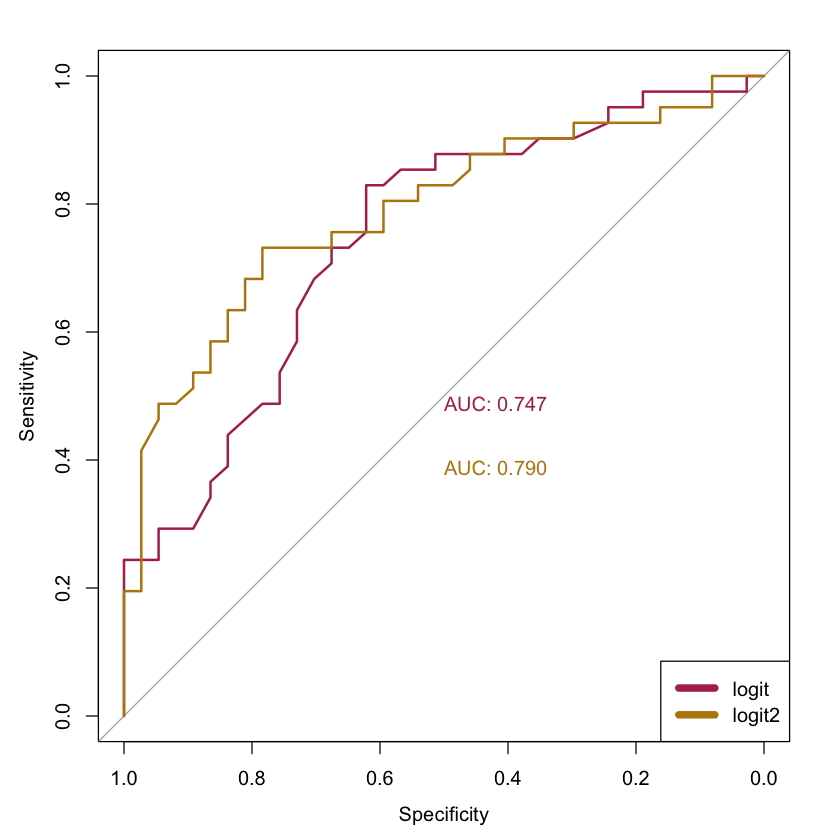

In [315]:
roc(ca,logit$fitted.values,plot =TRUE,col="maroon",print.auc=TRUE )
plot.roc(ca,logit2$fitted.values,col="darkgoldenrod",print.auc=TRUE,add=TRUE,print.auc.y=0.4)
legend("bottomright",legend=c("logit","logit2"),col=c("maroon","darkgoldenrod"),lwd=6)

##### <span style='color:tan'> her we apply the rock curve and we usully use it to compare different models ,so we apply ecg in the second model"logit2"
##### <span style='color:tan'>and we can notice that the logit2 have AUC "Area under the curve" is higher than logit ,so its seems that the logit2 is better predictive power than logit


In [3]:
x <- as.matrix(longley[,1:6])
y <- as.matrix(longley[,7])

cv.ridge <- cv.glmnet(x, y, alpha = 0, family = "gaussian") 
cv.ridge

Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”

$lambda
 [1] 3344.5168358 3047.3991782 2776.6766344 2530.0043353 2305.2457233
 [6] 2100.4540470 1913.8554987 1743.8338512 1588.9164582 1447.7614994
[11] 1319.1463581 1201.9570315 1095.1784816  997.8858438  909.2364158
[16]  828.4623587  754.8640461  687.8040048  626.7013928  571.0269683
[21]  520.2985063  474.0766211  431.9609607  393.5867395  358.6215784
[26]  326.7626258  297.7339347  271.2840726  247.1839433  225.2248031
[31]  205.2164523  186.9855883  170.3743040  155.2387204  141.4477404
[36]  128.8819130  117.4323991  107.0000284   97.4944408   88.8333034
[41]   80.9415975   73.7509691   67.1991363   61.2293502   55.7899035
[46]   50.8336823   46.3177580   42.2030161   38.4538164   35.0376854
[51]   31.9250340   29.0889019   26.5047241   24.1501174   22.0046876
[56]   20.0498518   18.2686782   16.6457392   15.1669776   13.8195851
[61]   12.5918913   11.4732623   10.4540093    9.5253040    8.6791022
[66]    7.9080747    7.2055431    6.5654225    5.9821685    5.4507291
[71]    4.96

In [2]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16

